In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [242]:
df=pd.read_csv('covid_country.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [243]:
print(df.dtypes)
print(df.info())

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB
None


In [244]:
df.keys()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

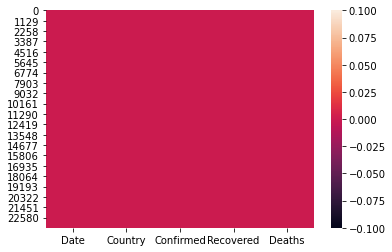

In [245]:
#checking null values
sns.heatmap(df.isnull())

In [246]:
df.set_index("Country",inplace=True)
df

,Date,Confirmed,Recovered,Deaths
Country,,,,
Afghanistan,2020-01-22,0,0,0
Albania,2020-01-22,0,0,0
Algeria,2020-01-22,0,0,0
Andorra,2020-01-22,0,0,0
Angola,2020-01-22,0,0,0
...,...,...,...,...
West Bank and Gaza,2020-05-26,429,365,3
Western Sahara,2020-05-26,9,6,1
Yemen,2020-05-26,249,10,49


In [247]:
#dropping Date column as it is not so much usefull in the data set
df.drop(["Date"],axis=1,inplace=True)

In [248]:
df.head()

,Confirmed,Recovered,Deaths
Country,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0


In [249]:
df.tail()

,Confirmed,Recovered,Deaths
Country,,,
West Bank and Gaza,429,365,3
Western Sahara,9,6,1
Yemen,249,10,49
Zambia,920,336,7
Zimbabwe,56,25,4


In [250]:
x=df["Confirmed"].sum()
print("Total confirmed cases =",x)

print("\n_______________________________________\n")

y=df["Recovered"].sum()
print("Total Recovered cases= ",y)

print("\n_______________________________________\n")

z=df["Deaths"].sum()
print("Total Deaths cases=",z)

Total confirmed cases = 188778378

_______________________________________

Total Recovered cases=  61157719

_______________________________________

Total Deaths cases= 12482037


In [251]:
covid={" Cases":["Confirmed","Recovered","Deaths"],"Numbers":[188778378,61157719,12482037]}
df1=pd.DataFrame(covid)
df1

,Cases,Numbers
0,Confirmed,188778378
1,Recovered,61157719
2,Deaths,12482037


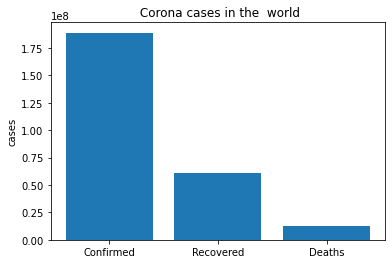

In [252]:
x=df1.iloc[:,0]
y=df1.iloc[:,-1]
plt.bar(x,y)
plt.ylabel("cases")
plt.title(" Corona cases in the  world")
 
plt.show()

Confirmed    AxesSubplot(0.125,0.657941;0.775x0.222059)
Recovered    AxesSubplot(0.125,0.391471;0.775x0.222059)
Deaths          AxesSubplot(0.125,0.125;0.775x0.222059)
dtype: object

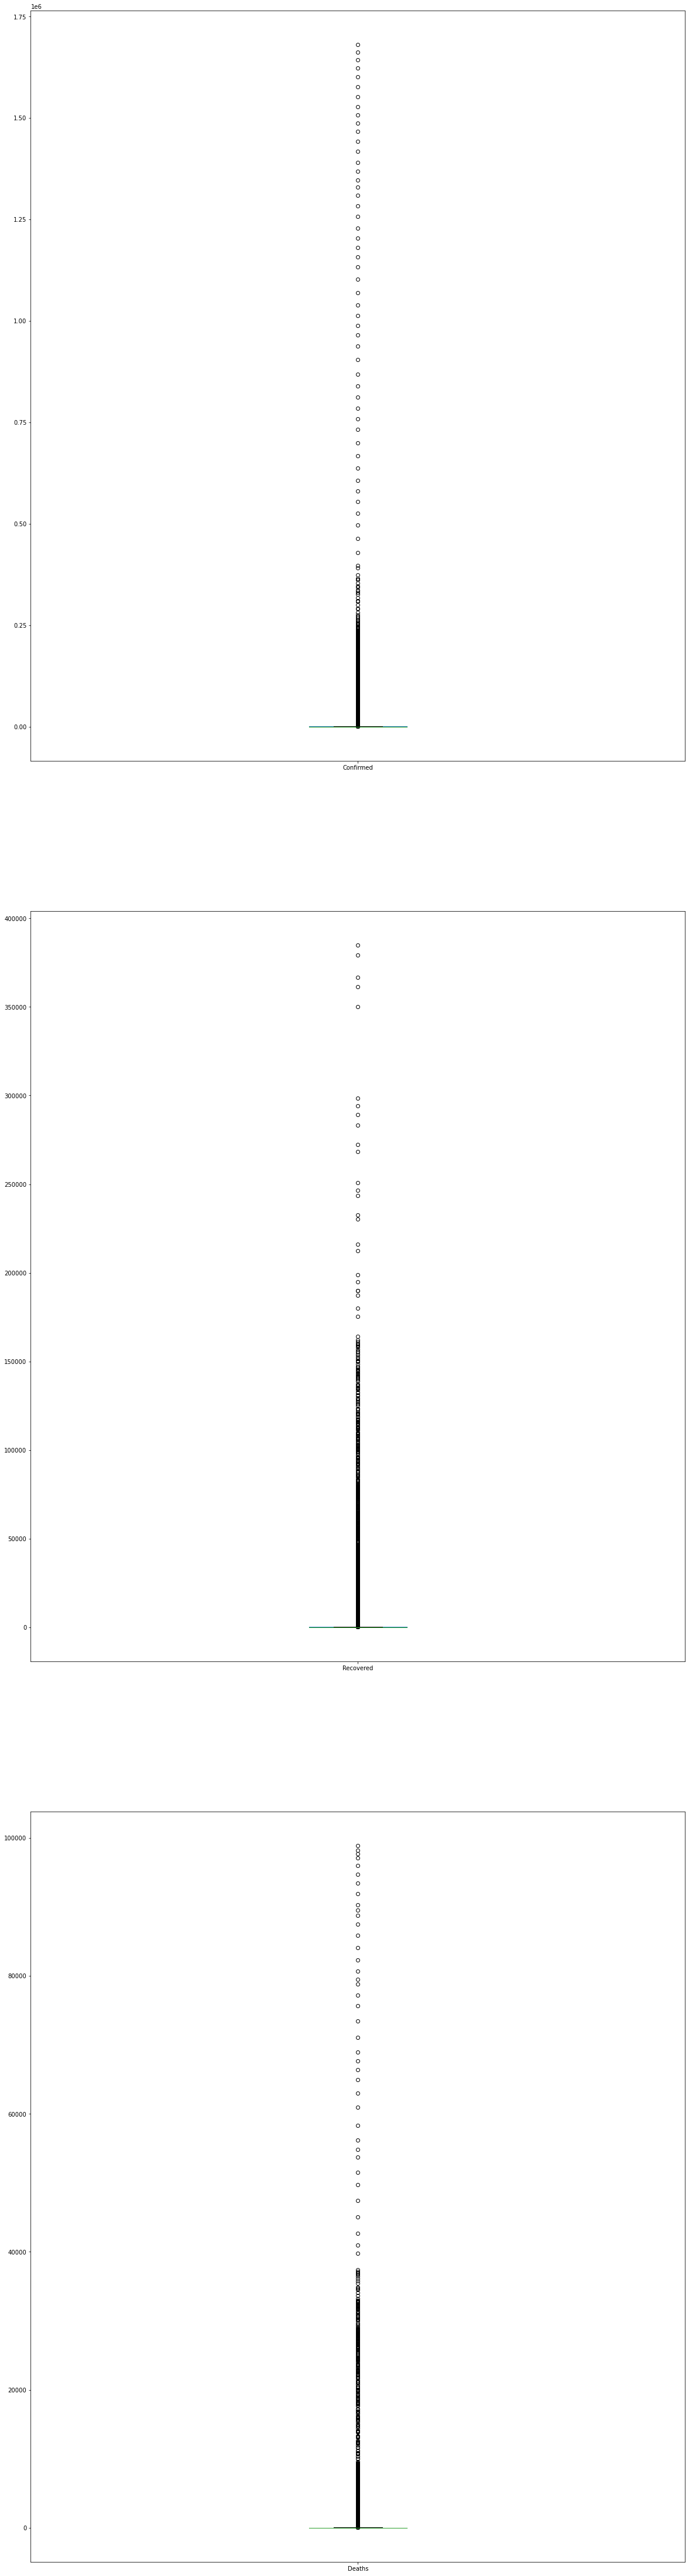

In [253]:
df.plot(kind='box',subplots=True,layout=(3,1),figsize=(20,80))

# Univariate Analysis

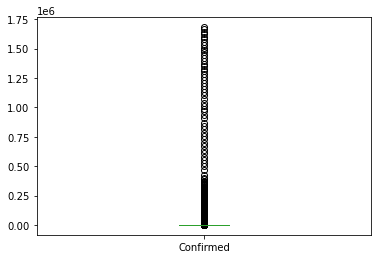

In [254]:
df["Confirmed"].plot.box()

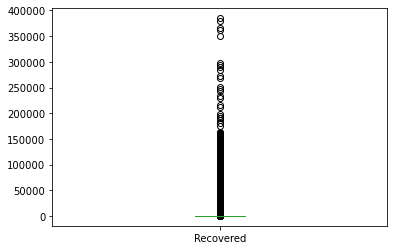

In [255]:
df["Recovered"].plot.box()

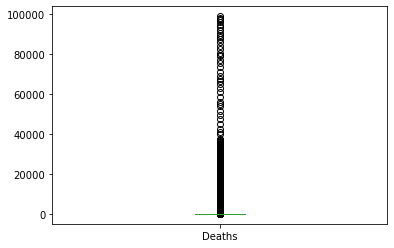

In [256]:
df["Deaths"].plot.box()

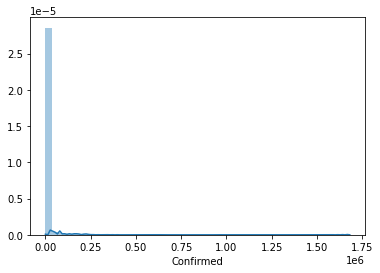

In [257]:
sns.distplot(df['Confirmed'])

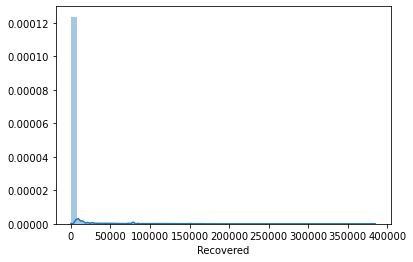

In [258]:
sns.distplot(df['Recovered'])

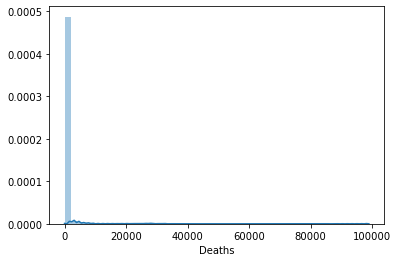

In [259]:
sns.distplot(df['Deaths'])

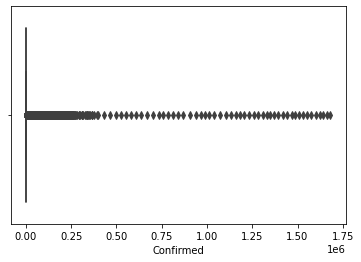

In [260]:
sns.boxplot(df['Confirmed'],data=df)

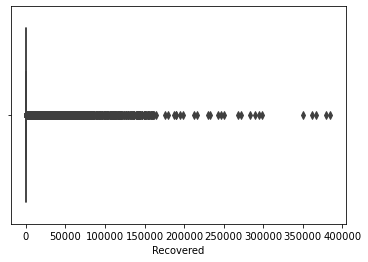

In [261]:
sns.boxplot(df['Recovered'],data=df)

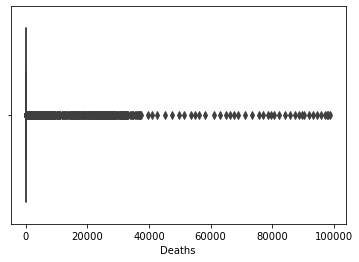

In [262]:
sns.boxplot(df['Deaths'],data=df)

# Bivariate Analysis

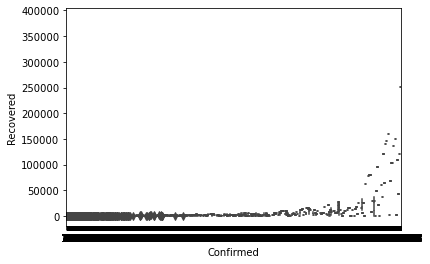

In [263]:
sns.boxplot(x ='Confirmed' ,y='Recovered',data=df)

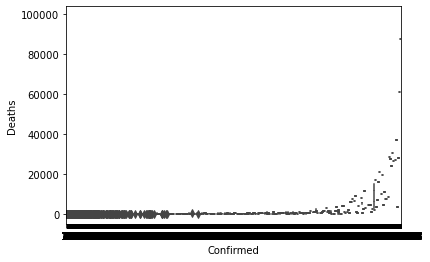

In [264]:
sns.boxplot(x='Confirmed',y='Deaths',data=df)

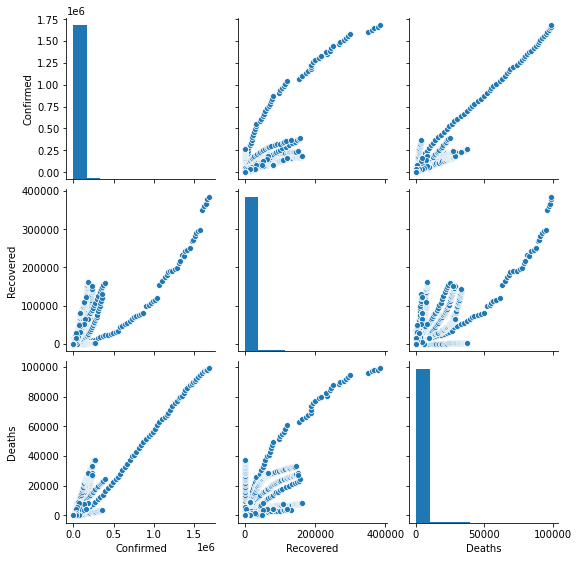

In [265]:
sns.pairplot(df)

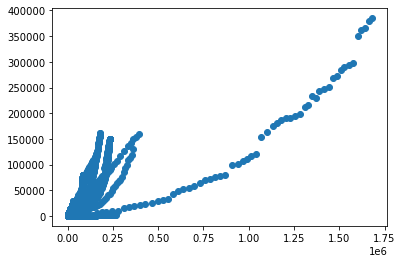

In [266]:
plt.scatter(x="Confirmed", y="Recovered",data=df)

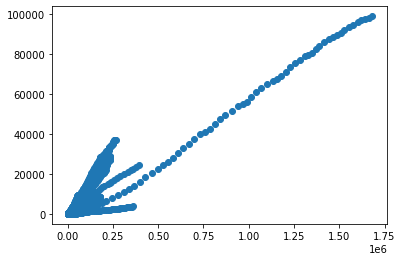

In [267]:
plt.scatter(x="Confirmed", y="Deaths",data=df)

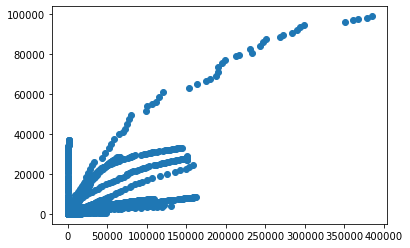

In [268]:
plt.scatter(x="Recovered", y="Deaths",data=df)

# Statistical Analysis

In [269]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


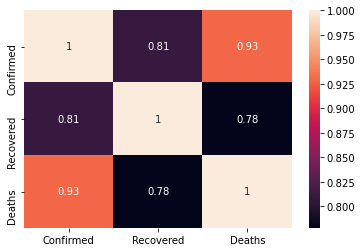

In [270]:
sns.heatmap(df.corr(),annot=True)

In [271]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


In [272]:
cols=['Confirmed','Recovered']
df.groupby(['Deaths'])[cols].mean()

,Confirmed,Recovered
Deaths,,
0,1.606644e+01,3.721688
1,1.016576e+02,16.785370
2,2.078366e+02,45.232061
3,2.469418e+02,43.750909
4,3.620000e+02,71.154321
...,...,...
95979,1.600937e+06,350135.000000
97087,1.622612e+06,361239.000000
97720,1.643246e+06,366736.000000


In [273]:
df.pivot_table(values=('Confirmed','Recovered'),index='Deaths')

,Confirmed,Recovered
Deaths,,
0,1.606644e+01,3.721688
1,1.016576e+02,16.785370
2,2.078366e+02,45.232061
3,2.469418e+02,43.750909
4,3.620000e+02,71.154321
...,...,...
95979,1.600937e+06,350135.000000
97087,1.622612e+06,361239.000000
97720,1.643246e+06,366736.000000


# Removing outliers and Skewness

In [274]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())


The shape before removing outliers and skewness (23688, 3)
skewness before removing outliers
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64
New shape after removing outliers (23177, 3)
skewness after removing outliers
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64


In [275]:
for i in df.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i])

In [276]:
df1.skew()

Confirmed    0.473662
Recovered    0.944097
Deaths       1.461751
dtype: float64

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df1))

MinMaxScaler()


In [278]:
df1.skew()

Confirmed    0.473662
Recovered    0.944097
Deaths       1.461751
dtype: float64

In [279]:
for i in df.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i])

In [280]:
df1.skew()

Confirmed    0.473662
Recovered    0.364613
Deaths       0.762200
dtype: float64

# Splitting Data into Input and Target

In [281]:
x=df1.iloc[:,0:-1]
x

,Confirmed,Recovered
Country,,
Afghanistan,0.000000,0.000000
Albania,0.000000,0.000000
Algeria,0.000000,0.000000
Andorra,0.000000,0.000000
Angola,0.000000,0.000000
...,...,...
West Bank and Gaza,6.063785,1.931903
Western Sahara,2.302585,1.080418
Yemen,5.521461,1.223156


In [282]:
y=df1.iloc[:,-1]
y

Country
Afghanistan           0.000000
Albania               0.000000
Algeria               0.000000
Andorra               0.000000
Angola                0.000000
                        ...   
West Bank and Gaza    0.869742
Western Sahara        0.526589
Yemen                 1.591686
Zambia                1.124748
Zimbabwe              0.959135
Name: Deaths, Length: 23177, dtype: float64

In [283]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [284]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [285]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 62 is 0.8523831907075341


In [286]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=20,scoring="r2").std())


Mean r2 score for Linear Regression: 0.43858080509696995
standard deviation in r2 score for Linear Regression 0.361655757478442


In [287]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'n_neighbors': 10}


{'alpha': 0.1}


{'criterion': 'mse'}




In [288]:
knn=KNeighborsRegressor(n_neighbors=10)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=20,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=20,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'friedman_mse')
i=maxr2_score(dtc,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=20,scoring="r2").std())

max r2 score corresponding to 62 is 0.9110535800224316


Mean r2 score for KNeighbor  Regression: 0.7708593962531068
standard deviation in r2 score for KNeighbor   Regression 0.10203816352179391

___________________________________________________________________________________________________________

max r2 score corresponding to 62 is 0.8515710728724599


Mean r2 score for Lasso Regression: 0.43584664182639515
standard deviation in r2 score for Lasso Regression 0.3610086611549568

___________________________________________________________________________________________________________

max r2 score corresponding to 93 is 0.8777060660609822


Mean r2 score for DecisionTreeRegressor : 0.7291428006917825
standard deviation in r2 score for DecisionTreeRegressor 0.13091789643651566


In [289]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,100,250,500],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'max_features': 'log2', 'n_estimators': 250}

In [290]:
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=500)
i=maxr2_score(rfr,x,y)

max r2 score corresponding to 62 is 0.915408321739944


In [291]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor : 0.7259192030963726
standard deviation in r2 score for RandomForestRegressor  0.05796080713730037


In [292]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.836416917655631
0.8119718872607826
0.8773575519472674


In [293]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [294]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
i=maxr2_score(gbr,x,y)

max r2 score corresponding to 56 is 0.9026848833712722


In [295]:
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.7651533298154685
standard deviation in r2 score for gradient boosting Regression 0.03837333606169068


In [296]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 88 ,test_size=0.20)
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=500)
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

array([0.        , 1.29172467, 0.        , ..., 0.05224418, 0.05224418,
       0.        ])

In [297]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.12423267848602182
r2_score is: 0.9720587039155473


# I choose Random Forest Regressor as my final model because it perform very well in the data set
RMSE is:  0.08721269831016364

r2_score is: 0.96000356029362

In [298]:
import joblib
joblib.dump(rfr,"covid_dataset.pkl")

['covid_dataset.pkl']